# Weighted Pool Invariant

In the context of Balancer-like weighted pools, the invariant, often denoted as \( K \), is a value that remains constant before and after trades (neglecting swap fees for simplicity). The invariant for a weighted pool is calculated using the balances of the tokens in the pool and their respective weights. The weights are fractions that sum to 1 (or 100%). 

The invariant is essential for determining the prices of tokens in the pool and for maintaining the value ratios dictated by the weights. The mathematical formula for the invariant is as follows:

$$ K = \prod_{i=1}^{n} B_i^{W_i} $$

where:

- \( K \) is the invariant.
- \( n \) is the number of tokens in the pool.
- \( B_i \) is the balance of the \( i \)-th token in the pool.
- \( W_i \) is the normalized weight of the \( i \)-th token, representing its proportion of the total pool value.

This invariant is used in the calculation of trades, liquidity provision, and removal in the pool. It ensures that the ratio of the weights to the balances is maintained, preserving the relative value of each token according to its weight within the pool.

In [15]:
from functools import reduce

def calculate_balancer_invariant(balances, weights):
    """
    Calculate the Balancer V2 invariant for given token balances and weights.
    
    :param balances: List of token balances in the pool.
    :param weights: List of token weights, which must sum up to 1.
    :return: The invariant for the Balancer pool.
    """
    # Check if the lengths of the balances and weights lists match
    if len(balances) != len(weights):
        raise ValueError("The number of balances must match the number of weights.")
    
    # Check if the sum of weights is 1 (or very close to it)
    if not 0.9999 < sum(weights) < 1.0001:
        raise ValueError("The sum of weights must be 1.")
    
    # Calculate the weighted product
    invariant = reduce(lambda x, y: x * y, [b ** w for b, w in zip(balances, weights)])
    
    return invariant

# Example usage:
balances = [100, 100]  # Example token balances
weights = [0.5, 0.5]  # Example weights that sum up to 1

try:
    invariant = calculate_balancer_invariant(balances, weights)
    print(f"The Weighted pool invariant is: {invariant}")
except ValueError as e:
    print(e)


The Weighted pool invariant is: 100.0


# Plotting the Weighted Pool Invariant

The invariant for a weighted pool, such as those used in Balancer-like systems, is a constant that represents the state of the pool's liquidity. For a two-token pool, the invariant (`K`) is defined as:

\[ K = B_1^{W_1} \times B_2^{W_2} \]

where `B_1` and `B_2` are the balances of the two tokens, and `W_1` and `W_2` are their respective weights in the pool. The weights sum up to 1 (i.e., \( W_1 + W_2 = 1 \)).

To understand the relationship between the balances of the two tokens while keeping the invariant constant, we can plot `B_2` as a function of `B_1`. The following Python code uses the `numpy` and `matplotlib` libraries to perform this calculation and generate the plot:

1. We set the weights `W1` and `W2` for the two tokens, ensuring that they sum up to 1.
2. We define an initial balance `B2_initial` for token 2 and calculate the invariant `K` using some initial balance `B1_initial` for token 1.
3. We create an array of possible balances for token 1 (`B1_values`) using `numpy.linspace`.
4. We then calculate the required balances for token 2 (`B2_values`) to maintain the invariant `K` for each balance of token 1.
5. Finally, we plot `B1_values` against `B2_values` using `matplotlib.pyplot`, creating a curve that shows the relationship between the two token balances that maintain the constant invariant.

This plot helps visualize how changing the balance of one token affects the required balance of the other token to keep the liquidity pool's value constant.


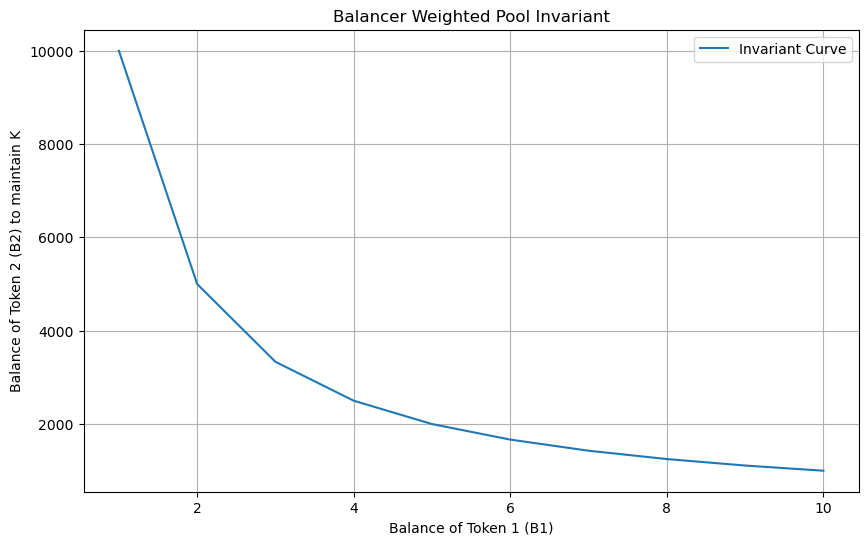

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Set the weights for the tokens
W1 = 0.5
W2 = 0.5

# Assume an initial balance for token 2
B2_initial = 100

# Assume an invariant K based on initial balances
B1_initial = 100
K = B1_initial**W1 * B2_initial**W2

# Generate a range of balances for token 1
B1_values = np.linspace(1, 10, 10)  # Change 1, 10 to the range you are interested in
B2_values = (K / B1_values**W1)**(1/W2)

# Plotting the invariant curve
plt.figure(figsize=(10, 6))
plt.plot(B1_values, B2_values, label='Invariant Curve')

# Axes and title
plt.title('Balancer Weighted Pool Invariant')
plt.xlabel('Balance of Token 1 (B1)')
plt.ylabel('Balance of Token 2 (B2) to maintain K')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import math
 
def calc_balance_given_bpt(balance, normalized_weight, bpt_total_supply, bpt_amount):
    #******************************************************************************************
    #   // a = balanceOut                                                                        //
    #   // b = balance                      /  /    totalBPT + bptAmount   \    (1 / w)       \  //
    #   // bptAmount = bptAmount   a = b * |  | --------------------------  | ^               |  //
    #   // bpt = totalBPT                   \  \       totalBPT            /                  /  //
    #   // w = weight                                                                            //
    #******************************************************************************************/

    # Calculate the invariant ratio
    invariant_ratio = (bpt_total_supply + bpt_amount) / bpt_total_supply

    # Calculate balance ratio
    balance_ratio = pow(invariant_ratio, 1 / normalized_weight)

    return balance * balance_ratio

In [18]:
import math

def compute_proportional_amounts_in(balances, bpt_total_supply, bpt_amount_out):
    """
    Compute proportional amounts in for each token.
    """
        #************************************************************************************
        #/ computeProportionalAmountsIn                                                    //
        #/ (per token)                                                                     //
        #/ aI = amountIn                   /      bptOut      \                            //
        #/ b = balance           aI = b * | ----------------- |                            //
        #/ bptOut = bptAmountOut           \  bptTotalSupply  /                            //
        #/ bpt = bptTotalSupply                                                            //
        #**********************************************************************************/
    bpt_ratio = bpt_amount_out / bpt_total_supply
    amounts_in = [(balance * bpt_ratio) for balance in balances]
    return amounts_in

def compute_proportional_amounts_out(balances, bpt_total_supply, bpt_amount_in):
    """
    Compute proportional amounts out for each token.
    """
        #**********************************************************************************************
        #/ computeProportionalAmountsOut                                                             //
        #/ (per token)                                                                               //
        #/ aO = tokenAmountOut             /        bptIn         \                                  //
        #/ b = tokenBalance      a0 = b * | ---------------------  |                                 //
        #/ bptIn = bptAmountIn             \     bptTotalSupply    /                                 //
        #/ bpt = bptTotalSupply                                                                      //
        #*********************************************************************************************/
    bpt_ratio = bpt_amount_in / bpt_total_supply
    amounts_out = [(balance * bpt_ratio) for balance in balances]
    return amounts_out


# Example:
balances = [1000, 1000]  # Example balances without precision scaling
bpt_amount_out = 100 # BPT amount out to mint
bpt_amount_in = 100 # BPT amount out to mint
bpt_total_supply = 1000  # Total supply of pool tokens


amounts_in = compute_proportional_amounts_in(balances, bpt_total_supply, bpt_amount_out)
print(f"amounts_in: {amounts_in}\n")
amounts_out = compute_proportional_amounts_out(balances, bpt_total_supply, bpt_amount_in)
print(f"amounts_out: {amounts_out}\n")



amounts_in: [100.0, 100.0]

amounts_out: [100.0, 100.0]



In [43]:
def calc_out_given_in(balance_in, weight_in, balance_out, weight_out, amount_in, swap_fee_percentage):
    """
    Computes how many tokens can be taken out of a pool if `amount_in` are sent,
    given the current balances and weights.
    """
    
    #**********************************************************************************************
    #   // outGivenExactIn                                                                                //
    #   // aO = amountOut                                                                            //
    #   // bO = balanceOut                                                                           //
    #   // bI = balanceIn              /      /            bI             \    (wI / wO) \           //
    #   // aI = amountIn    aO = bO * |  1 - | --------------------------  | ^            |          //
    #   // wI = weightIn               \      \       ( bI + aI )         /              /           //
    #    // wO = weightOut                                                                           //
    #**********************************************************************************************/


    # Calculating the output
    denominator = balance_in + amount_in
    base = balance_in / denominator  
    exponent = weight_in / weight_out 
    power = base ** exponent
    amount_out = balance_out * (1 - power)

    return amount_out - amount_out * swap_fee_percentage

# Pool balances and weights
balance_in = 500
balance_out = 500
weight_in = 0.50
weight_out = 0.50
# Amount you want to add to the pool for Token A and B
amount_in = 500.0
swap_fee_percentage = 0.50  # Swap fee percentage

amount_out = calc_out_given_in(balance_in, weight_in, balance_out, weight_out, amount_in, swap_fee_percentage)
print(f"amount_out", amount_out)


amount_out 125.0


In [61]:
from scipy.optimize import fsolve

def find_amount_to_swap(balance_in, balance_out, weight_in, weight_out, amount_in, swap_fee_percentage):
    # Define the pool invariant function
    invariant = lambda x, y: (x ** weight_in) * (y ** weight_out)
    # Function to find the root of
    def equations(x):
        swap_amount = x[0]
        received_amount = calc_out_given_in(balance_in, weight_in, balance_out, weight_out, swap_amount, swap_fee_percentage);
        # The equation we want to solve is that received_amount should be equal to (amount_in - swap_amount)
        
        return [received_amount - (amount_in - swap_amount) / (balance_in / balance_out)]

    # Make an initial guess for the amount to swap
    initial_guess = [amount_in * 0.5]
    # Solve the equation
    swap_amount_A = fsolve(equations, initial_guess)

    return swap_amount_A[0]

# Pool balances and weights
balance_in = 1000
balance_out = 1000
weight_in = 0.50
weight_out = 0.50
# Amount you want to add to the pool for Token A and B
amount_in = 100
swap_fee_percentage = 0.50  # Swap fee percentage


# Find the amount to swap
swap_amount = find_amount_to_swap(balance_in, balance_out, weight_in, weight_out, amount_in, swap_fee_percentage)
amount_out = calc_out_given_in(balance_in, weight_in, balance_out, weight_out, swap_amount, swap_fee_percentage)
print(f"Swapping from Token A to Token B {swap_amount} to receive {amount_out}.")
print(f"One sided add liquidity of [{amount_in}, 0] is equal to proportional add [{amount_in - swap_amount} {amount_out}].")


Swapping from Token A to Token B 68.1145747868608 to receive 31.885425213139197.
One sided add liquidity of [100, 0] is equal to proportional add [31.8854252131392 31.885425213139197].


# Add Liquidity

## Unbalanced

In [49]:

def calc_bpt_out_given_exact_tokens_in(balances, normalized_weights, amounts_in, bpt_total_supply, swap_fee_percentage):
    balance_ratios_with_fee = [0] * len(amounts_in)
    invariant_ratio_with_fees = 0
    invariant_ratio = 1

    # First, calculate the sum of the balance ratios times their weights.
    for i in range(len(balances)):
        balance_ratios_with_fee[i] = (balances[i] + amounts_in[i]) / balances[i]
        invariant_ratio_with_fees += balance_ratios_with_fee[i] * normalized_weights[i]

    # Then, calculate the invariant ratio.
    for i in range(len(balances)):
        print(f"balance_ratios_with_fee[{i}], {balance_ratios_with_fee[i]}")
        print(f"invariant_ratio_with_fees, {invariant_ratio_with_fees}")
        if balance_ratios_with_fee[i] > invariant_ratio_with_fees:
            # If the balance ratio with fee is greater than the average, we apply the swap fee.
            non_taxable_amount = balances[i] * (invariant_ratio_with_fees - 1) if invariant_ratio_with_fees > 1 else 0            
            print(f"non_taxable_amount, {non_taxable_amount}")
            print(f"taxable_amount, {amounts_in[i] - non_taxable_amount}")
            print(f"amounts_in[{i}], {amounts_in[i]}")
            swap_fee = (amounts_in[i] - non_taxable_amount) * swap_fee_percentage
            print(f"swap_fee, {swap_fee}")
            amount_in_without_fee = amounts_in[i] - swap_fee
        else:
            amount_in_without_fee = amounts_in[i]

        balance_ratio = (balances[i] + amount_in_without_fee) / balances[i]
        # The power should be computed using floating-point arithmetic, not integers.
        invariant_ratio *= balance_ratio ** normalized_weights[i]
        print(f"invariant_ratio", invariant_ratio)
        print(f"\n")

    # Finally, calculate the amount of BPT to mint, which is proportional to the increase in the invariant.
    if invariant_ratio > 1:
        bpt_out = int(bpt_total_supply * (invariant_ratio - 1))
    else:
        bpt_out = 0

    return bpt_out

# Example:
balances = [1000, 1000]  # Example balances without precision scaling
normalized_weights = [0.5, 0.5]  # Normalized weights
amounts_in = [100, 0]  # Amounts to add to the pool
bpt_total_supply = 1000  # Total supply of pool tokens
swap_fee_percentage = 0.50 # Swap fee percentage

bpt_out = calc_bpt_out_given_exact_tokens_in(balances, normalized_weights, amounts_in, bpt_total_supply, swap_fee_percentage)
print(f"BPT to mint: {bpt_out}\n")



balance_ratios_with_fee[0], 1.1
invariant_ratio_with_fees, 1.05
non_taxable_amount, 50.00000000000004
taxable_amount, 49.99999999999996
amounts_in[0], 100
swap_fee, 24.99999999999998
invariant_ratio 1.036822067666386


balance_ratios_with_fee[1], 1.0
invariant_ratio_with_fees, 1.05
invariant_ratio 1.036822067666386


BPT to mint: 36



In [63]:
from functools import partial

def calc_add_liquidity_unbalanced(balances, amounts_in, bpt_total_supply, swap_fee_percentage, calc_invariant):
    tokens_number = len(balances)    
    old_balances = balances
    new_balances = [old + amount for old, amount in zip(old_balances, amounts_in)]
    invariant0 = calc_invariant(old_balances)
    invariant1 = calc_invariant(new_balances)
    invariant_ratio = invariant1 / invariant0
    
    fee_adjusted_balances = []
    # Calculate taxable_amounts, fees, and fee_adjusted_balances using loops
    for i in range(tokens_number):
        taxable_amount = new_balances[i] - invariant_ratio * old_balances[i]
        if(taxable_amount > 0):
            print(f"taxable_amount: {taxable_amount}")
            fee = swap_fee_percentage * taxable_amount
            print(f"fee: {fee}")
            
            fee_adjusted_balances.append(new_balances[i] - fee)
        else:
            fee_adjusted_balances.append(new_balances[i])
        

    print(f"fee_adjusted_balances", fee_adjusted_balances)
    
    taxable_amounts = [(new_balance - invariant_ratio * old_balance)
            for old_balance, new_balance in zip(old_balances, new_balances)]
    print(f"taxable_amounts: {taxable_amounts}")
    taxable_amounts = [taxable if taxable > 0 else 0 for taxable in taxable_amounts]
    fees = [swap_fee_percentage * taxable for taxable in taxable_amounts]
    fee_adjusted_balances = [new_balance - fee for new_balance, fee in zip(new_balances, fees)]
    
    print(f"fee_adjusted_balances", fee_adjusted_balances)
    invariant2 = calc_invariant(fee_adjusted_balances)
    
    print(f"(invariant2 - invariant0) / invariant0)", (invariant2 - invariant0) / invariant0)
    
    mint_amount = bpt_total_supply * (invariant2 - invariant0) / invariant0
    
    return mint_amount


# Example:
balances = [1000, 1000]  # Example balances without precision scaling
normalized_weights = [0.5, 0.5]  # Normalized weights
amounts_in = [100, 0]  # Amounts to add to the pool
bpt_total_supply = 1000  # Total supply of pool tokens
swap_fee_percentage = 0.50  # Swap fee percentage

bpt_out = calc_add_liquidity_unbalanced(balances, amounts_in, bpt_total_supply, swap_fee_percentage, partial(calculate_balancer_invariant, weights=normalized_weights))
print(f"BPT to mint: {bpt_out}\n")

taxable_amount: 51.19115182984842
fee: 25.59557591492421
fee_adjusted_balances [1074.4044240850758, 1000]
taxable_amounts: [51.19115182984842, -48.80884817015158]
fee_adjusted_balances [1074.4044240850758, 1000.0]
(invariant2 - invariant0) / invariant0) 0.03653481566471055
BPT to mint: 36.53481566471055



## Exact BPT Out

In [33]:
def calc_token_in_given_exact_bpt_out(balance, normalized_weight, bpt_amount_out, bpt_total_supply, swap_fee_percentage):
    ONE = 1.0  # Equivalent to FixedPoint.ONE in Solidity
    
    #******************************************************************************************
    #   // tokenInForExactBPTOut                                                                 //
    #   // a = amountIn                                                                          //
    #   // b = balance                      /  /    totalBPT + bptOut      \    (1 / w)       \  //
    #   // bptOut = bptAmountOut   a = b * |  | --------------------------  | ^          - 1  |  //
    #   // bpt = totalBPT                   \  \       totalBPT            /                  /  //
    #   // w = weight                                                                            //
    #******************************************************************************************/

    # Calculate the invariant ratio
    invariant_ratio = (bpt_total_supply + bpt_amount_out) / bpt_total_supply

    # Calculate balance ratio
    balance_ratio = pow(invariant_ratio, 1 / normalized_weight)

    amount_in_without_fee = balance * (balance_ratio - ONE)

    print(f"amount_in_without_fee", amount_in_without_fee)
    # Calculate taxable and non-taxable amounts
    taxable_amount = amount_in_without_fee * (1 - normalized_weight)
    print(f"taxable_amount", taxable_amount)
    non_taxable_amount = amount_in_without_fee - taxable_amount
    print(f"non_taxable_amount", non_taxable_amount)

    # Calculate fees
    taxable_amount_plus_fees = taxable_amount / (1 - swap_fee_percentage)

    return non_taxable_amount + taxable_amount_plus_fees

# Example usage
result = calc_token_in_given_exact_bpt_out(balance=1000, normalized_weight=0.50, bpt_amount_out=100, bpt_total_supply=1000, swap_fee_percentage=0.10)
print(f"final_amount_in", result)

amount_in_without_fee 210.0000000000002
taxable_amount 105.0000000000001
non_taxable_amount 105.0000000000001
final_amount_in 221.66666666666686


In [32]:
from functools import partial

def calc_add_liquidity_single_token_exact_out(balances, token_index, bpt_amount_out, bpt_total_supply, swap_fee_percentage, calc_token_in_given_exact_bpt_out):
    # Calculate the fee factor based on the number of tokens and the swap fee percentage
    # Calculate the initial amount of token needed for the desired amount of BPT out
    new_balance = calc_balance_given_bpt_generic(balances, token_index, bpt_amount_out, bpt_total_supply)
    amount_in = new_balance - balances[token_index]
    print(f"amount_in", amount_in)
    
    non_taxable_balance = (bpt_total_supply + bpt_amount_out) * balances[token_index] / bpt_total_supply
    print(f"non_taxable_balance", non_taxable_balance)
    taxable_amount = (amount_in + balances[token_index]) - non_taxable_balance
    print(f"taxable_amount", taxable_amount)
    fee = taxable_amount / (1 - swap_fee_percentage) - taxable_amount
    print(f"fee", fee)
    amount_in_with_fee = amount_in + fee
    print(f"amount_in_with_fee", amount_in_with_fee)
    
    return amount_in_with_fee;

def calc_balance_given_bpt_generic(balances, token_index, bpt_amount_out, bpt_total_supply):
    return calc_balance_given_bpt(balances[token_index], normalized_weights[token_index], bpt_total_supply, bpt_amount_out)


# Example:
balances = [1000, 1000]  # Example balances without precision scaling
normalized_weights = [0.5, 0.5]  # Normalized weights
token_index = 0  # Token to add
bpt_amount_out = 100 # BPT amount out to mint
bpt_total_supply = 1000  # Total supply of pool tokens
swap_fee_percentage = 0.10  # Swap fee percentage

amount_in = calc_add_liquidity_single_token_exact_out(balances, token_index, bpt_amount_out, bpt_total_supply, swap_fee_percentage, calc_balance_given_bpt_generic)
print(f"amount_in: {amount_in}\n")

amount_in 210.00000000000023
non_taxable_balance 1100.0
taxable_amount 110.00000000000023
fee 12.222222222222243
amount_in_with_fee 222.22222222222246
amount_in: 222.22222222222246



# Remove Liquidity

## Exact Token Out

In [25]:
def calc_bpt_in_given_exact_token_out(balance, normalized_weight, amount_out, bpt_total_supply, swap_fee_percentage):
    balance_ratio_without_fee = (balance - amount_out) / balance
    complement_normalized_weight = 1 - normalized_weight
    invariant_ratio_without_fees = balance_ratio_without_fee * normalized_weight + complement_normalized_weight

    if invariant_ratio_without_fees > balance_ratio_without_fee:
        non_taxable_amount = balance * (1 - invariant_ratio_without_fees);
        taxable_amount = amount_out - non_taxable_amount
        print(f"taxable_amount: {taxable_amount}\n")
        taxable_amount_plus_fees = taxable_amount / (1 - swap_fee_percentage)
        print(f"taxable_amount_plus_fees: {taxable_amount_plus_fees}\n")
        amount_out_with_fee = non_taxable_amount + taxable_amount_plus_fees
    else:
        amount_out_with_fee = amount_out
        if amount_out_with_fee == 0:
            return 0

    balance_ratio = (balance - amount_out_with_fee) / balance
    invariant_ratio = balance_ratio ** normalized_weight
    print(f"invariant_ratio: {invariant_ratio}\n")
    return bpt_total_supply * (1 - invariant_ratio)

# Example usage
bpt_in = calc_bpt_in_given_exact_token_out(
    balance=1000,
    normalized_weight=0.5,
    amount_out=100,
    bpt_total_supply=1000,
    swap_fee_percentage=0.50
)
print(f"bpt_in: {bpt_in}\n") 


taxable_amount: 49.99999999999996

taxable_amount_plus_fees: 99.99999999999991

invariant_ratio: 0.9219544457292888

bpt_in: 78.04555427071125



In [26]:
from functools import partial

def calc_remove_liquidity_single_token_exact_out(balances, token_index, amount_out, bpt_total_supply, swap_fee_percentage, calc_invariant):
    tokens_number = len(balances)
    amounts_out = [0] * tokens_number
    amounts_out[token_index] = amount_out;
    
    old_balances = balances
    new_balances = [old - amount for old, amount in zip(old_balances, amounts_out)]
    print(f"new_balances: {new_balances}")
    invariant0 = calc_invariant(old_balances)
    invariant1 = calc_invariant(new_balances)
    
    taxable_amounts = [((invariant1 * old_balance / invariant0) - new_balance)
            for old_balance, new_balance in zip(old_balances, new_balances)]
    print(f"taxable_amounts: {taxable_amounts}") 
    taxable_amounts = [taxable if taxable > 0 else 0 for taxable in taxable_amounts]
    fees = [taxable / (1 - swap_fee_percentage) - taxable for taxable in taxable_amounts]
    print(f"fees: {fees}")
    fee_adjusted_balances = [new_balance - fee for new_balance, fee in zip(new_balances, fees)]
    print(f"fee_adjusted_balances: {fee_adjusted_balances}")

    invariant2 = calc_invariant(fee_adjusted_balances)
    
    print(f"(invariant2 - invariant0) / invariant0)", (invariant0 - invariant2) / invariant0)
    
    return bpt_total_supply * (invariant0 - invariant2 ) / invariant0

# Example:
balances = [1000, 1000]  # Example balances without precision scaling
normalized_weights = [0.5, 0.5]  # Normalized weights
amount_out = 100  # Amounts to add to the pool
token_index = 0
bpt_total_supply = 1000  # Total supply of pool tokens
swap_fee_percentage = 0.50  # Swap fee percentage

bpt_in = calc_remove_liquidity_single_token_exact_out(balances, token_index, amount_out, bpt_total_supply, swap_fee_percentage, partial(calculate_balancer_invariant, weights=normalized_weights))
print(f"bpt_in: {bpt_in}\n") 

new_balances: [900, 1000]
taxable_amounts: [48.68329805051383, -51.31670194948617]
fees: [48.68329805051383, 0.0]
fee_adjusted_balances: [851.3167019494862, 1000.0]
(invariant2 - invariant0) / invariant0) 0.07733174870407186
bpt_in: 77.33174870407186



## Exact Bpt In

In [27]:
def calc_token_out_given_exact_bpt_in(balance, normalized_weight, bpt_amount_in, bpt_total_supply, swap_fee_percentage):
        #*****************************************************************************************
        #/ exactBPTInForTokenOut                                                                //
        #/ a = amountOut                                                                        //
        #/ b = balance                     /      /    totalBPT - bptIn       \    (1 / w)  \   //
        #/ bptIn = bptAmountIn    a = b * |  1 - | --------------------------  | ^           |  //
        #/ bpt = totalBPT                  \      \       totalBPT            /             /   //
        #/ w = weight                                                                           //
        #****************************************************************************************/

    # Calculate the factor by which the invariant will decrease after burning BPTAmountIn
    invariant_ratio = (bpt_total_supply - bpt_amount_in) / bpt_total_supply
    balance_ratio = (invariant_ratio ** (1 / normalized_weight))

    # Using complement to avoid reverts if balanceRatio is greater than one
    amount_out_without_fee = balance * (1 - balance_ratio)
    print(f"amount_out_without_fee: {amount_out_without_fee}\n")

    # Computing swap fees
    taxable_amount = amount_out_without_fee * (1 - normalized_weight)
    print(f"taxable_amount: {taxable_amount}\n")
    non_taxable_amount = amount_out_without_fee - taxable_amount
    taxable_amount_minus_fees = taxable_amount * (1 - swap_fee_percentage)

    return non_taxable_amount + taxable_amount_minus_fees

# Example usage
amount_out = calc_token_out_given_exact_bpt_in(
    balance=1000,
    normalized_weight=0.5,
    bpt_amount_in=100,
    bpt_total_supply=1000,
    swap_fee_percentage=0.50
)
print(f"amount_out: {amount_out}\n")

amount_out_without_fee: 189.99999999999994

taxable_amount: 94.99999999999997

amount_out: 142.49999999999994



In [65]:
from functools import partial

def calc_remove_liquidity_single_token_exact_in(balances, token_index, bpt_amount_in, bpt_total_supply, swap_fee_percentage, calc_token_out_given_exact_bpt_in):
    new_balance = calc_balance_given_bpt_generic(balances, token_index, -bpt_amount_in, bpt_total_supply)
    amount_out = balances[token_index] - new_balance
    print(f"amount_out", amount_out)
    
    non_taxable_balance = (bpt_total_supply - bpt_amount_in) * balances[token_index] / bpt_total_supply
    print(f"non_taxable_balance", non_taxable_balance)
    taxable_amount = non_taxable_balance - (balances[token_index] - amount_out)
    print(f"taxable_amount", taxable_amount)
    fee =  taxable_amount * swap_fee_percentage
    print(f"fee", fee)
    amount_out_with_fee = amount_out - fee
    print(f"amount_out_with_fee", amount_out_with_fee)
    
    return amount_out_with_fee;
 
def calc_balance_given_bpt_generic(balances, token_index, bpt_amount_in, bpt_total_supply):
    return calc_balance_given_bpt(balances[token_index], normalized_weights[token_index], bpt_total_supply, bpt_amount_in)

# Example:
balances = [1000, 1000]  # Example balances without precision scaling
normalized_weights = [0.5, 0.5]  # Normalized weights
bpt_amount_in = 100 # 
token_index = 0
bpt_total_supply = 1000  # Total supply of pool tokens
swap_fee_percentage = 0.50  # Swap fee percentage

amount_out = calc_remove_liquidity_single_token_exact_in(balances, token_index, bpt_amount_in, bpt_total_supply, swap_fee_percentage, calc_balance_given_bpt_generic)
print(f"amount_out: {amount_out}\n")

amount_out 190.0
non_taxable_balance 900.0
taxable_amount 90.0
fee 45.0
amount_out_with_fee 145.0
amount_out: 145.0

